# Teste Técnico para Ciência de Dados da Keyrus

## 1ª parte: Análise Exploratória

- [x] Tipos de variáveis
- [ ] Medidas de posição
- [ ] Medidas de dispersão
- [x] Tratamento de Missing Values
- [ ] Gráficos
- [x] Análise de Outliers

## 2ª parte: Estatística

- [ ] Estatística descritiva
- [ ] Identificação das distribuições das variáveis

## 3ª parte: Modelagem

- [ ] Modelos de previsão
- [ ] Escolha de melhor modelo
- [ ] Avaliação de resultados
- [ ] Métricas

## Imports

In [137]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno # missing values

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Other
from IPython.display import Image
import configparser
import warnings
import pprint
import os

## Preparação do Diretório Principal

In [138]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [139]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projetos/challenges/challenge-keyrus'

## Preparação do Ambiente

In [140]:
from src.environment.prepare_env import *


main()

Requirements this project:

missingno==0.4.1
numpy==1.16.4
seaborn==0.9.0
pandas==0.24.2
matplotlib==3.1.0
ipython==7.6.0
scikit_learn==0.21.2
atlas==0.27.0

--------------------------------------------------
Configuration Environment:

OS:
Linux
Distributor ID:	Ubuntu
Description:	Ubuntu 19.04
Release:	19.04
Codename:	disco

Python Version:
Python 3.7.3

Pip Version:
pip 19.1.1 from /home/campos/projetos/venv_global/lib/python3.7/site-packages/pip (python 3.7)

Jupyter Version:
jupyter core     : 4.5.0
jupyter-notebook : 5.7.8
qtconsole        : 4.5.1
ipython          : 7.5.0
ipykernel        : 5.1.1
jupyter client   : 5.2.4
jupyter lab      : not installed
nbconvert        : 5.5.0
ipywidgets       : 7.4.2
nbformat         : 4.4.0
traitlets        : 4.3.2

--------------------------------------------------

Disk Usage:

data:
6,9M	data/

virtual env:
658M	venv_keyrus/

all:
680M	.

--------------------------------------------------
Structure This Project:

.
├── data
│   ├── callcente

## Cell Format

In [141]:
config = configparser.ConfigParser()
config.read('src/visualization/plot_config.ini')

figure_titlesize = config['figure']['figure_titlesize']
figure_figsize_large = int(config['figure']['figure_figsize_large'])
figure_figsize_width = int(config['figure']['figure_figsize_width'])
figure_dpi = int(config['figure']['figure_dpi'])
figure_facecolor = config['figure']['figure_facecolor']
figure_autolayout = bool(config['figure']['figure_autolayout'])

font_family = config['font']['font_family']
font_size = int(config['font']['font_size'])

legend_loc = config['legend']['legend_loc']
legend_fontsize = int(config['legend']['legend_fontsize'])

In [142]:
# Customizing file matplotlibrc

# Figure
plt.rcParams['figure.titlesize'] = figure_titlesize
plt.rcParams['figure.figsize'] = [figure_figsize_large, figure_figsize_width] 
plt.rcParams['figure.dpi'] = figure_dpi
plt.rcParams['figure.facecolor'] = figure_facecolor
plt.rcParams['figure.autolayout'] = figure_autolayout

# Font
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = font_size

# Legend
plt.rcParams['legend.loc'] = legend_loc
plt.rcParams['legend.fontsize'] = legend_fontsize

In [143]:
# Guarantees visualization inside the jupyter
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Format the data os all table (float_format 3)
pd.set_option('display.float_format', '{:.6}'.format)

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# pretty print
pp = pprint.PrettyPrinter(indent=4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Carregamento dos Dados

Irei trabalhar com dataframe.

In [144]:
%%time

df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',',
                            verbose=True)

Tokenization took: 38.33 ms
Type conversion took: 41.21 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 6.46 ms
Type conversion took: 8.15 ms
Parser memory cleanup took: 0.00 ms
CPU times: user 105 ms, sys: 8.15 ms, total: 113 ms
Wall time: 112 ms


## Variáveis Globais

In [145]:
# Lists that will be manipulated in the data processing
list_columns = []
list_categorical_col = []
list_numerical_col = []

In [146]:
def get_col(df: 'dataframe', type_descr: 'numpy') -> list:
    """
    Function get list columns 
    
    Args:
    type_descr
        np.number, np.object -> return list with all columns
        np.number            -> return list numerical columns 
        np.object            -> return list object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')    
    else:
        return col.tolist() 

In [147]:
list_numerical_col = get_col(df=df_callcenter,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_callcenter,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])

---

## Análise Exploratória

In [148]:
!cat data/callcenter_descricao.txt

O dataset fornece o resultado de uma campanha de marketing para cada usuário (sim - comprou / nao - não comprou)

Temos como variáveis:

Dados do cliente:
   1 - idade
   2 - profissao
   3 - estado_civil
   4 - educacao
   5 - inadimplente
   6 - emprestimo_moradia: possui empréstimo para moradia?
   7 - emprestimo_pessoal: possui empréstimo pessoal?
Dados relacionados com últimos contatos:
   8 - meio_contato: tipo de contato
   9 - mes: último mês de contato
  10 - dia_da_semana: último dia da semana de contato
  11 - duracao: última duração do contato, em segundos. Nota: este atributo causa overfitting no modelo.
Outras variáveis:
  12 - qtd_contatos_campanha: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - dias_ultimo_contato: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - qtd_contatos_total: number of contacts pe

#### Notas
- O callcenter é voltado à vendas

### Análise das Primeiras Linhas

In [149]:
display(df_callcenter.head(10))

,Unnamed: 0,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
0,0,56,dona_casa,casado,fundamental_4a,nao,nao,nao,telefone,mai,seg,261,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
1,1,57,servicos,casado,ensino_medio,NaN,nao,nao,telefone,mai,seg,149,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
2,2,37,servicos,casado,ensino_medio,nao,sim,nao,telefone,mai,seg,226,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
3,3,40,admin.,casado,fundamental_6a,nao,nao,nao,telefone,mai,seg,151,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
4,4,56,servicos,casado,ensino_medio,nao,nao,sim,telefone,mai,seg,307,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
5,5,45,servicos,casado,fundamental_9a,NaN,nao,nao,telefone,mai,seg,198,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
6,6,59,admin.,casado,curso_tecnico,nao,nao,nao,telefone,mai,seg,139,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
7,7,41,colarinho_azul,casado,NaN,NaN,nao,nao,telefone,mai,seg,217,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
8,8,24,tecnico,solteiro,curso_tecnico,nao,sim,nao,telefone,mai,seg,380,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
9,9,25,servicos,solteiro,ensino_medio,nao,sim,nao,telefone,mai,seg,50,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao


### Remover a Coluna de Índice
- Quando se converte um arquivo de `csv` para `dataframe` é inserido um índice.
- Então, o dataframe já tem um índice e trás algumas funcionalidades que auxiliar a manipulação dos dados.
- Analisar uma tabela com um índice que não seja do dataframe pode ser prejudicial para uma análise, como por exemplo na detecção de valores duplicados.

In [150]:
df_callcenter = df_callcenter.drop(columns='Unnamed: 0', axis=0)

In [151]:
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])
list_numerical_col = get_col(df=df_callcenter,
                             type_descr=np.number)

### Formato dos Dados 

In [152]:
print("Dataframe:\n{} rows\n{} columns".format(df_callcenter.shape[0],
                                               df_callcenter.shape[1]))

Dataframe:
41188 rows
20 columns


### Informações sobre as Colunas
- Nomes
- Linhas por colunas
- Tipos de dados em cada coluna
- Formato do dataframe

In [153]:
list_columns = (df_callcenter.columns).tolist()

print("-"*25, "List Columns", "-"*25, end='\n')
display(list_columns)

------------------------- List Columns -------------------------


['idade',
 'profissao',
 'estado_civil',
 'educacao',
 'inadimplente',
 'emprestimo_moradia',
 'emprestimo_pessoal',
 'meio_contato',
 'mes',
 'dia_da_semana',
 'duracao',
 'qtd_contatos_campanha',
 'dias_ultimo_contato',
 'qtd_contatos_total',
 'campanha_anterior',
 'indice_precos_consumidor',
 'indice_confianca_consumidor',
 'euribor3m',
 'numero_empregados',
 'resultado']

**OBS:** Não há espaços em branco nos nomes de colunas

In [154]:
print(df_callcenter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
idade                          41188 non-null int64
profissao                      40858 non-null object
estado_civil                   41108 non-null object
educacao                       39457 non-null object
inadimplente                   32591 non-null object
emprestimo_moradia             40198 non-null object
emprestimo_pessoal             40198 non-null object
meio_contato                   41188 non-null object
mes                            41188 non-null object
dia_da_semana                  41188 non-null object
duracao                        41188 non-null int64
qtd_contatos_campanha          41188 non-null int64
dias_ultimo_contato            41188 non-null int64
qtd_contatos_total             41188 non-null int64
campanha_anterior              41188 non-null object
indice_precos_consumidor       41188 non-null float64
indice_confianca_consumidor    41188 non-null f

Neste momento não há necessidade de formatar as colunas para outros tipos de dados.

In [155]:
print(df_callcenter.nunique())

idade                            78
profissao                        11
estado_civil                      3
educacao                          7
inadimplente                      2
emprestimo_moradia                2
emprestimo_pessoal                2
meio_contato                      2
mes                              10
dia_da_semana                     5
duracao                        1544
qtd_contatos_campanha            42
dias_ultimo_contato              27
qtd_contatos_total                8
campanha_anterior                 3
indice_precos_consumidor         26
indice_confianca_consumidor      26
euribor3m                       316
numero_empregados                11
resultado                         2
dtype: int64


In [156]:
def show_measures_location(df: 'dataframe', type_descr: 'list') -> None:
    """
    Function get measures localization + total col + % type columns 
    Handler when type data not exists
    
    Args:
    type_descr
        np.number, np.object  -> return summary statistic with all columns
        np.number             -> return summary statistic numerical columns 
        np.object             -> return summary statistic object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n\n')    
    else:
        list_col = col.tolist()
        percentage = (len(list_col) / df.shape[1]) * 100
        
        print("-"*25, "MEASURES OF LOCALIZATION", "-"*25, end='\n\n')
        print(f"TOTAL columns {type_descr}: {len(list_col)}")
        print("PERCENTAGE {} in dataframe: {:3.4} %".format(type_descr, percentage))
        
        return df.describe(include=type_descr)

In [157]:
show_measures_location(df=df_callcenter,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 20
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
count,41188.0,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188.0,41188.0,41188.0,41188.0,41188,41188.0,41188.0,41188.0,41188.0,41188
unique,nan,11,3,7,2,2,2,2,10,5,nan,nan,nan,nan,3,nan,nan,nan,nan,2
top,nan,admin.,casado,graduacao_completa,nao,sim,nao,celular,mai,qui,nan,nan,nan,nan,nao_existente,nan,nan,nan,nan,nao
freq,nan,10422,24928,12168,32588,21576,33950,26144,13769,8623,nan,nan,nan,nan,35563,nan,nan,nan,nan,36548
mean,40.0241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285,2.56759,962.475,0.172963,NaN,93.5757,-40.5026,3.62129,5167.04,NaN
std,10.4212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279,2.77001,186.911,0.494901,NaN,0.57884,4.6282,1.73445,72.2515,NaN
min,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,92.201,-50.8,0.634,4963.6,NaN
25%,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,1.0,999.0,0.0,NaN,93.075,-42.7,1.344,5099.1,NaN
50%,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,2.0,999.0,0.0,NaN,93.749,-41.8,4.857,5191.0,NaN
75%,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.0,3.0,999.0,0.0,NaN,93.994,-36.4,4.961,5228.1,NaN


#### Colunas Numéricas

In [158]:
show_measures_location(df=df_callcenter,
                       type_descr=[np.number])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>]: 9
PERCENTAGE [<class 'numpy.number'>] in dataframe: 45.0 %


,idade,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0
mean,40.0241,258.285,2.56759,962.475,0.172963,93.5757,-40.5026,3.62129,5167.04
std,10.4212,259.279,2.77001,186.911,0.494901,0.57884,4.6282,1.73445,72.2515
min,17.0,0.0,1.0,0.0,0.0,92.201,-50.8,0.634,4963.6
25%,32.0,102.0,1.0,999.0,0.0,93.075,-42.7,1.344,5099.1
50%,38.0,180.0,2.0,999.0,0.0,93.749,-41.8,4.857,5191.0
75%,47.0,319.0,3.0,999.0,0.0,93.994,-36.4,4.961,5228.1
max,98.0,4918.0,56.0,999.0,7.0,94.767,-26.9,5.045,5228.1


#### Colunas Categóricas

In [159]:
show_measures_location(df=df_callcenter,
                       type_descr=[np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'object'>]: 11
PERCENTAGE [<class 'object'>] in dataframe: 55.0 %


,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,campanha_anterior,resultado
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,casado,graduacao_completa,nao,sim,nao,celular,mai,qui,nao_existente,nao
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


- Persistir as colunas em suas respectivas listas

In [160]:
list_categorical_col = get_col(df=df_callcenter,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])

---

## Dados Irrelevantes
Nesta parte vou analisar cada coluna categórica para ver se os dados inseridos fazem sentido no meio em que se encontram.

In [161]:
def show_categorical_values(df: 'DataFrame', *columns: list) -> None:
    for column in columns:
        list_unique = df[column].unique()
        print(f"The categorical column {column} contains this values:\n{list_unique}\n")

In [162]:
show_categorical_values(df_callcenter, *list_categorical_col)

The categorical column profissao contains this values:
['dona_casa' 'servicos' 'admin.' 'colarinho_azul' 'tecnico' 'aposentado'
 'gerente' 'desempregado' 'informal' nan 'empreendedor' 'estudante']

The categorical column estado_civil contains this values:
['casado' 'solteiro' 'divorciado' nan]

The categorical column educacao contains this values:
['fundamental_4a' 'ensino_medio' 'fundamental_6a' 'fundamental_9a'
 'curso_tecnico' nan 'graduacao_completa' 'analfabeto']

The categorical column inadimplente contains this values:
['nao' nan 'sim']

The categorical column emprestimo_moradia contains this values:
['nao' 'sim' nan]

The categorical column emprestimo_pessoal contains this values:
['nao' 'sim' nan]

The categorical column meio_contato contains this values:
['telefone' 'celular']

The categorical column mes contains this values:
['mai' 'jun' 'jul' 'ago' 'out' 'nov' 'dez' 'mar' 'abr' 'set']

The categorical column dia_da_semana contains this values:
['seg' 'ter' 'qua' 'qui' 'sex'

#### Notas
- Não há valores escritos de forma errada ou duplicada.
- Todos os valores estão fazendo sentido semântico com suas colunas.

---

### Data Preprocessing
- Algoritmos de aprendizagem estatística, trabalham apenas com valores numéricos, então, se deixar valores de rótulo como strings, a librarie scikit-learn, por exemplo, faria a conversão internamente (mais especificamente, os rótulos de string serão convertidos em valores flutuantes desconhecidos).

#### Mapear Valores Internos das Colunas 

In [163]:
# map

def map_values(df: 'dataframe', column: str, dict_label: dict) -> None:
    df[column] = df[column].map(dict_label)    
    return print(f'Type column {column}: {df[column].dtypes}')

Os únicos dados das colunas categóricas que fazem sentido ter uma ordem numérica são:
- `mes`
- `dia_da_semana`

In [164]:
dict_week = {'seg': 1,
             'ter': 2,
             'qua': 3,
             'qui': 4,
             'sex': 5}

# dict not contains jan and feb
dict_month = {'mar': 3,
              'abr': 4,
              'mai': 5,
              'jun': 6,
              'jul': 7,
              'ago': 8,
              'set': 9,
              'out': 10,
              'nov': 11,
              'dez': 12}

In [165]:
map_values(df_callcenter, 'mes', dict_month)
map_values(df_callcenter, 'dia_da_semana', dict_week)

Type column mes: int64
Type column dia_da_semana: int64


In [166]:
# I used the dictionary because they are more efficient in these cases
# https://stackoverflow.com/questions/22084338/pandas-dataframe-performance

def generate_cat_unique_by_col(df: 'dataframe', *columns: list) -> dict:
    dict_unique = {}
    
    for column in columns:
        list_unique = df[column].unique().tolist()
        dict_column = {}
    
        for element in list_unique:
            if isinstance(element, float) is True:  # type nan is float
                continue
            dict_column[element] = int(list_unique.index(element))
        # add dict column in principal dict 
        dict_unique[column] = dict_column          
    
    print("-"*25, "Dictionary with Values Map by Column", "-"*25, end='\n\n')
    return dict_unique

In [167]:
dict_cat_unique = generate_cat_unique_by_col(df_callcenter, 
                                             *list_categorical_col)

pp.pprint(dict_cat_unique)

------------------------- Dictionary with Values Map by Column -------------------------

{   'campanha_anterior': {'fracasso': 1, 'nao_existente': 0, 'sucesso': 2},
    'dia_da_semana': {1: 0, 2: 1, 3: 2, 4: 3, 5: 4},
    'educacao': {   'analfabeto': 7,
                    'curso_tecnico': 4,
                    'ensino_medio': 1,
                    'fundamental_4a': 0,
                    'fundamental_6a': 2,
                    'fundamental_9a': 3,
                    'graduacao_completa': 6},
    'emprestimo_moradia': {'nao': 0, 'sim': 1},
    'emprestimo_pessoal': {'nao': 0, 'sim': 1},
    'estado_civil': {'casado': 0, 'divorciado': 2, 'solteiro': 1},
    'inadimplente': {'nao': 0, 'sim': 2},
    'meio_contato': {'celular': 1, 'telefone': 0},
    'mes': {3: 7, 4: 8, 5: 0, 6: 1, 7: 2, 8: 3, 9: 9, 10: 4, 11: 5, 12: 6},
    'profissao': {   'admin.': 2,
                     'aposentado': 5,
                     'colarinho_azul': 3,
                     'desempregado': 7,
          

- É preciso que todos os dados que eram categóricos sejam valores numéricos.

In [168]:
map_values(df_callcenter, 'profissao', dict_cat_unique['profissao'])
map_values(df_callcenter, 'estado_civil', dict_cat_unique['estado_civil'])
map_values(df_callcenter, 'educacao', dict_cat_unique['educacao'])

map_values(df_callcenter, 'inadimplente', dict_cat_unique['inadimplente'])
map_values(df_callcenter, 'emprestimo_moradia', dict_cat_unique['emprestimo_moradia'])
map_values(df_callcenter, 'emprestimo_pessoal', dict_cat_unique['emprestimo_pessoal'])

map_values(df_callcenter, 'meio_contato', dict_cat_unique['meio_contato'])
map_values(df_callcenter, 'campanha_anterior', dict_cat_unique['campanha_anterior'])

map_values(df_callcenter, 'resultado', dict_cat_unique['resultado'])

Type column profissao: float64
Type column estado_civil: float64
Type column educacao: float64
Type column inadimplente: float64
Type column emprestimo_moradia: float64
Type column emprestimo_pessoal: float64
Type column meio_contato: int64
Type column campanha_anterior: int64
Type column resultado: int64


#### NOTA
- A partir de agora temos novos valores para as lista de colunas.
- Todas as colunas viraram numéricas, então para manter informações de tipagem de colunas não vou executar novamente a função que gera a listagem de colunas por tipos.

---

## Missing Values

In [169]:
# isnull()

def check_if_contains_missing_val(df: 'DataFrame'):
    """
    Return TRUE, if collumn contains values missing
    """
    list_columns_missing = []
    
    for index, value in enumerate(df.isnull().any()):
        if value is True:
            list_columns_missing.append(df.columns[index])
    
    if len(list_columns_missing) > 0:
        print("Columns's name with missing values:")
        return list_columns_missing   
    
    print("The dataframe NOT contains missing values.")
    return 0

In [170]:
list_columns_m_v = check_if_contains_missing_val(df_callcenter)

display(list_columns_m_v)  # display show one column by line

Columns's name with missing values:


['profissao',
 'estado_civil',
 'educacao',
 'inadimplente',
 'emprestimo_moradia',
 'emprestimo_pessoal']

In [171]:
def check_quat_missing_data(df: 'DataFrame', columns_m_v: list) -> None:
    """
    Check if contains missing data
    Mark missing, if line contains NaN in any column
    """    
    if len(columns_m_v) > 0:
        missing_values_count = df.isnull().sum()
        total_missing = missing_values_count.sum()
        total_lines = df.shape[0]
        total_cells = np.product(df.shape)

        percentage_by_line = (total_missing/total_lines) * 100
        percentage_by_cell = (total_missing/total_cells) * 100

        # by column
        quant_missing_by_column = df[columns_m_v].isnull().sum()
        percentage_missing_by_column = (quant_missing_by_column/total_lines) * 100

        print("-"*25, "MISSING VALUES", "-"*25)
        print("\nSHAPE of data: {}".format(df.shape[0]))
        print("TOTAL missing values: {}".format(total_missing))
        print("TOTAL missing values by column:\n{}\n".format(quant_missing_by_column))

        print("PERCENTAGE missing values by row: {:2.3} %".format(percentage_by_line))
        print("PERCENTAGE missing values by cell: {:2.3} %".format(percentage_by_cell))
        print("PERCENTAGE missing values by column:\n{}".format(percentage_missing_by_column))    

In [172]:
check_quat_missing_data(df_callcenter, list_columns_m_v)

------------------------- MISSING VALUES -------------------------

SHAPE of data: 41188
TOTAL missing values: 12718
TOTAL missing values by column:
profissao              330
estado_civil            80
educacao              1731
inadimplente          8597
emprestimo_moradia     990
emprestimo_pessoal     990
dtype: int64

PERCENTAGE missing values by row: 30.9 %
PERCENTAGE missing values by cell: 1.54 %
PERCENTAGE missing values by column:
profissao            0.801204
estado_civil         0.194231
educacao              4.20268
inadimplente          20.8726
emprestimo_moradia    2.40361
emprestimo_pessoal    2.40361
dtype: float64


#### Análise Gráfica de Missing Values

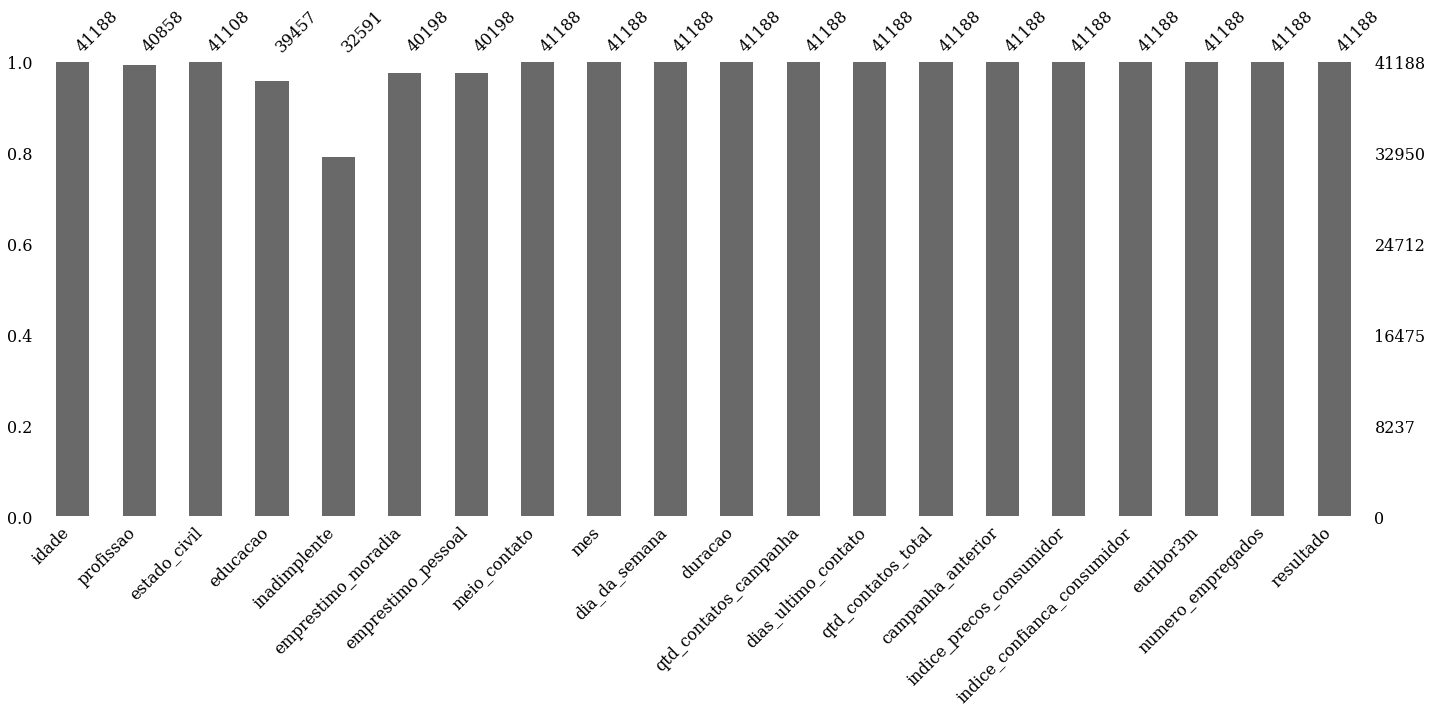

In [173]:
# Show missing by columns
msno.bar(df_callcenter,figsize=(20,10),
         fontsize=font_size,
         labels=True)

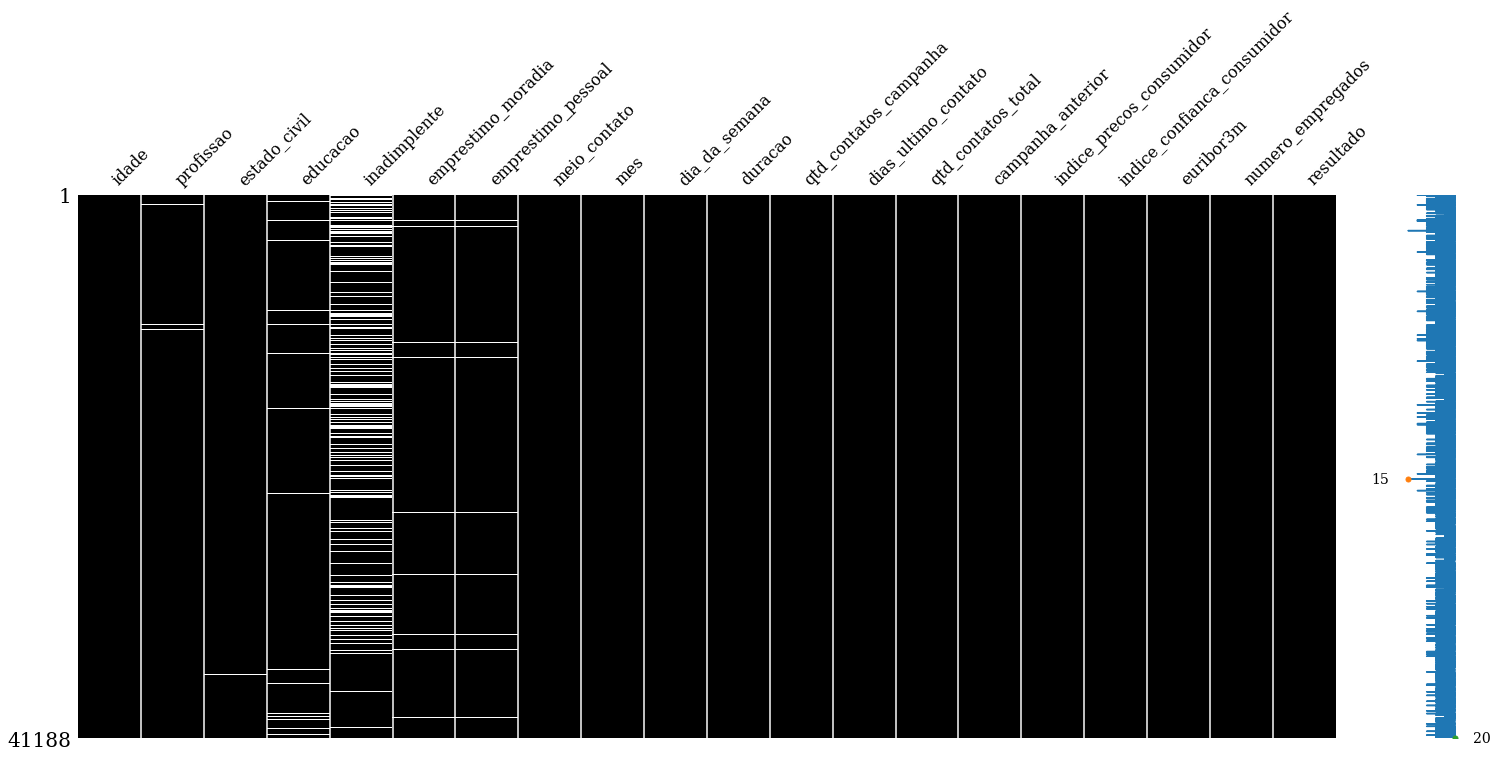

In [174]:
unsorted_data = msno.nullity_sort(df_callcenter)

msno.matrix(unsorted_data, 
            color=None,
            fontsize=font_size)

#### Notas
- Há somente missing values em provindos de **dados categóricos** que foram convertidos.
- Se deletar as linhas com dados faltantes pode ser um grande prejuízo, pois temos **30.8 %** linhas apresentando esse padrão porém somente **1.5 %** das células apresenta _missing values_.

### Tratamento de Missing Values

##### Colunas Numéricas
- Se fosse o caso, utilizaria a técnica de preenchimento com o valor médio da coluna: `fillna`
- Adiciona menos variância ao dataset do que fazer uma interpolação 

##### Colunas Categóricas
- Vou utilizar a técnica de preenchimento com o valor da moda da coluna: `fillna`

#### Aplicar a Moda em Valores Categoricos

In [175]:
%%timeit

for column in df_callcenter[list_categorical_col]:
    df_callcenter[column].fillna(df_callcenter[column].mode()[0], inplace=True)

9.93 ms ± 652 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [176]:
# Check result
df_callcenter.head(30)

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
0,56,0.0,0.0,0.0,0.0,0.0,0.0,0,5,1,261,1,999,0,0,93.994,-36.4,4.857,5191.0,0
1,57,1.0,0.0,1.0,0.0,0.0,0.0,0,5,1,149,1,999,0,0,93.994,-36.4,4.857,5191.0,0
2,37,1.0,0.0,1.0,0.0,1.0,0.0,0,5,1,226,1,999,0,0,93.994,-36.4,4.857,5191.0,0
3,40,2.0,0.0,2.0,0.0,0.0,0.0,0,5,1,151,1,999,0,0,93.994,-36.4,4.857,5191.0,0
4,56,1.0,0.0,1.0,0.0,0.0,1.0,0,5,1,307,1,999,0,0,93.994,-36.4,4.857,5191.0,0
5,45,1.0,0.0,3.0,0.0,0.0,0.0,0,5,1,198,1,999,0,0,93.994,-36.4,4.857,5191.0,0
6,59,2.0,0.0,4.0,0.0,0.0,0.0,0,5,1,139,1,999,0,0,93.994,-36.4,4.857,5191.0,0
7,41,3.0,0.0,6.0,0.0,0.0,0.0,0,5,1,217,1,999,0,0,93.994,-36.4,4.857,5191.0,0
8,24,4.0,1.0,4.0,0.0,1.0,0.0,0,5,1,380,1,999,0,0,93.994,-36.4,4.857,5191.0,0
9,25,1.0,1.0,1.0,0.0,1.0,0.0,0,5,1,50,1,999,0,0,93.994,-36.4,4.857,5191.0,0


---

## Valores Duplicados
É quando a linha inteira é duplicada

In [177]:
# duplicated()

def check_quat_duplicated_data(df: 'DataFrame') -> None:
    """
    Check if contains duplicated data
    Mark duplicates as ``True`` if enough row equal
    Except for the first occurrence.    
    """
    duplicated = df.duplicated().sum()
    total_lines = df_callcenter.shape[0]
    percentage = (duplicated/total_lines) * 100
    
    print("-"*25, "DUPLICATED DATA", "-"*25,)
    print("\nSHAPE of data: {}".format(df.shape[0]))
    print("TOTAL duplicated data: {}".format(duplicated))
    print("PERCENTAGE duplicated data: {:3.2} %".format(percentage)) 

In [178]:
check_quat_duplicated_data(df_callcenter)

------------------------- DUPLICATED DATA -------------------------

SHAPE of data: 41188
TOTAL duplicated data: 14
PERCENTAGE duplicated data: 0.034 %


#### Visualização dos Valores Duplicados

In [179]:
# Create dataframe only duplicated values
df_duplicated_value = df_callcenter[df_callcenter.duplicated(keep=False)]

display(df_duplicated_value.head(28))

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
236,56,3.0,0.0,0.0,0.0,0.0,0.0,0,5,1,136,1,999,0,0,93.994,-36.4,4.857,5191.0,0
1265,39,3.0,0.0,2.0,0.0,0.0,0.0,0,5,4,124,1,999,0,0,93.994,-36.4,4.855,5191.0,0
1266,39,3.0,0.0,2.0,0.0,0.0,0.0,0,5,4,124,1,999,0,0,93.994,-36.4,4.855,5191.0,0
5664,56,3.0,0.0,0.0,0.0,0.0,0.0,0,5,1,136,1,999,0,0,93.994,-36.4,4.857,5191.0,0
12260,36,5.0,0.0,6.0,0.0,0.0,0.0,0,7,4,88,1,999,0,0,93.918,-42.7,4.966,5228.1,0
12261,36,5.0,0.0,6.0,0.0,0.0,0.0,0,7,4,88,1,999,0,0,93.918,-42.7,4.966,5228.1,0
14155,27,4.0,1.0,4.0,0.0,0.0,0.0,1,7,1,331,2,999,0,0,93.918,-42.7,4.962,5228.1,0
14234,27,4.0,1.0,4.0,0.0,0.0,0.0,1,7,1,331,2,999,0,0,93.918,-42.7,4.962,5228.1,0
16819,47,4.0,2.0,1.0,0.0,1.0,0.0,1,7,4,43,3,999,0,0,93.918,-42.7,4.962,5228.1,0
16956,47,4.0,2.0,1.0,0.0,1.0,0.0,1,7,4,43,3,999,0,0,93.918,-42.7,4.962,5228.1,0


#### Remover Valores Duplicados

In [180]:
# drop_duplicates()

df_callcenter = df_callcenter.drop_duplicates(keep='first')
print("Shape dataframe = ", df_callcenter.shape)

Shape dataframe =  (41174, 20)


---

## Conversão de Tipos
- A partir daqui o dataframe pode ser do tipo: `integer` pois os missing values foram tratados.
- Há exceções que continuaram sendo float, contudo limitado a 2 dígitos depois da vírgula:
  - `indice_precos_consumidor`
  - `indice_confianca_consumidor`
  - `euribor3m`

In [181]:
def handler_typing(df: 'dataframe', type_col: str, list_cont_feature: list, *columns: list):
    for column in columns:
        if column in list_cont_feature:
            print(column)
            df[column] = df[column].map('{:,.2f}'.format) \
                        .astype(float) # object -> float
            continue
            
        df[column] = df[column].astype(dtype=type_col, errors='raise')
    
    return df.info(), display(df.head())

In [182]:
list_cont_feature = ['indice_precos_consumidor',
                     'indice_confianca_consumidor',
                     'euribor3m']

handler_typing(df_callcenter, 'int16', list_cont_feature, *list_columns)

indice_precos_consumidor
indice_confianca_consumidor
euribor3m
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41174 entries, 0 to 41187
Data columns (total 20 columns):
idade                          41174 non-null int16
profissao                      41174 non-null int16
estado_civil                   41174 non-null int16
educacao                       41174 non-null int16
inadimplente                   41174 non-null int16
emprestimo_moradia             41174 non-null int16
emprestimo_pessoal             41174 non-null int16
meio_contato                   41174 non-null int16
mes                            41174 non-null int16
dia_da_semana                  41174 non-null int16
duracao                        41174 non-null int16
qtd_contatos_campanha          41174 non-null int16
dias_ultimo_contato            41174 non-null int16
qtd_contatos_total             41174 non-null int16
campanha_anterior              41174 non-null int16
indice_precos_consumidor       41174 non-null fl

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
0,56,0,0,0,0,0,0,0,5,1,261,1,999,0,0,93.99,-36.4,4.86,5191,0
1,57,1,0,1,0,0,0,0,5,1,149,1,999,0,0,93.99,-36.4,4.86,5191,0
2,37,1,0,1,0,1,0,0,5,1,226,1,999,0,0,93.99,-36.4,4.86,5191,0
3,40,2,0,2,0,0,0,0,5,1,151,1,999,0,0,93.99,-36.4,4.86,5191,0
4,56,1,0,1,0,0,1,0,5,1,307,1,999,0,0,93.99,-36.4,4.86,5191,0


(None, None)

#### Nota
- O dataframe diminuiu de **memory usage: 6.3 MB** para menos que **3.0 MB**

---

## Outliers
- A função `pandas.describe()` trás algumas informações sobre que compõem o boxplot.

In [183]:
df_callcenter.describe()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
count,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0,41174.0
mean,40.0236,3.61782,0.504833,3.3194,0.000145723,0.547919,0.151746,0.634721,6.60774,2.97962,258.324,2.56796,962.463,0.173022,0.169962,93.5752,-40.5031,3.62135,5166.85,0.112668
std,10.4206,2.41163,0.688451,2.22744,0.0170714,0.497705,0.358779,0.481514,2.04104,1.41153,259.309,2.77036,186.941,0.494975,0.45582,0.579911,4.62788,1.73455,72.3292,0.316191
min,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,92.2,-50.8,0.63,4963.0,0.0
25%,32.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,102.0,1.0,999.0,0.0,0.0,93.08,-42.7,1.34,5099.0,0.0
50%,38.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,6.0,3.0,180.0,2.0,999.0,0.0,0.0,93.75,-41.8,4.86,5191.0,0.0
75%,47.0,4.0,1.0,6.0,0.0,1.0,0.0,1.0,8.0,4.0,319.0,3.0,999.0,0.0,0.0,93.99,-36.4,4.96,5228.0,0.0
max,98.0,11.0,2.0,7.0,2.0,1.0,1.0,1.0,12.0,5.0,4918.0,56.0,999.0,7.0,2.0,94.77,-26.9,5.04,5228.0,1.0


In [184]:
# quantile()

dict_quantile = {}


def calculate_quantile_by_col(df: 'dataframe', *columns: list) -> None:
    """
    Calculate boxplot
    """
    for column in columns:
        dict_col = {}
       
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1  # Interquartile range

        dict_col[column] = {'q1': q1,
                            'q3': q3,
                            'iqr': iqr}
        # add dict column in principal dict
        dict_quantile.update(dict_col)


def calculate_fence(dict_col: 'dataframe', *columns: list) -> None:
    for column in columns:
        dict_actual_col = dict_col[column]  # mount internal dict of dict_quantile
        dict_fence = {}  # auxiliar dict
        
        fence_low  = dict_actual_col['q1'] - 1.5 * dict_actual_col['iqr']
        fence_high = dict_actual_col['q3'] + 1.5 * dict_actual_col['iqr']
        
        dict_fence = {'fence_low': fence_low,
                     'fence_high': fence_high}
        
        # add dict column in principal dict
        dict_col[column].update(dict_fence)


def count_outlier(df: 'dataframe', dict_quantile: dict, *columns: list):
    for column in columns:
        # mount internal dict of dict_quantile
        dict_actual_col = dict_quantile[column]

        outlier_less_q1 = (df[column] < dict_actual_col['fence_low']).sum()  # numpy.int64
        outlier_more_q3 = (df[column] > dict_actual_col['fence_high']).sum()  # numpy.int64
        total = outlier_less_q1 + outlier_more_q3
        
        dict_outlier = {'outlier_less_q1': outlier_less_q1,
                        'outlier_more_q3': outlier_more_q3,
                        'outlier_total': total}
        
        # add dict column in principal dict
        dict_quantile[column].update(dict_outlier)
        
    print("-"*25, "Dict Quantilie", "-"*25, end='\n\n')
    return pp.pprint(dict_quantile)


def check_quat_outlier(df: 'dataframe', dict_quantile: dict, *columns: list):
    outlier_total = 0
    total_lines = df.shape[0]
    total_cells = np.product(df.shape)
    
    print("-"*15, "OUTLIERS", "-"*15)
    print("\nSHAPE of data: {}".format(df.shape[0]))
    print("\nPERCENTAGE outlier by column:") 
    
    # by column
    for column in columns:
        dict_actual_col = dict_quantile[column]  # mount internal dict of dict_quantile
        outlier_total += dict_actual_col['outlier_total']

        quant_outlier_by_col = dict_actual_col['outlier_total']
        percentage_outlier_by_col = (quant_outlier_by_col/total_lines) * 100
        
        print("{}: {:4.4} %".format(column, percentage_outlier_by_col)) 

        
    percentage_by_line = (outlier_total/total_lines) * 100
    percentage_by_cell = (outlier_total/total_cells) * 100
        
    print("PERCENTAGE outlier by line: {:2.3} %".format(percentage_by_line))
    print("PERCENTAGE outlier by cell: {:2.3} %".format(percentage_by_cell))
    print("\nTOTAL outlier: {}".format(outlier_total))

In [185]:
# run
calculate_quantile_by_col(df_callcenter, *list_columns)

calculate_fence(dict_quantile, *list_columns)

count_outlier(df_callcenter, dict_quantile, *list_columns)

------------------------- Dict Quantilie -------------------------

{   'campanha_anterior': {   'fence_high': 0.0,
                             'fence_low': 0.0,
                             'iqr': 0.0,
                             'outlier_less_q1': 0,
                             'outlier_more_q3': 5625,
                             'outlier_total': 5625,
                             'q1': 0.0,
                             'q3': 0.0},
    'dia_da_semana': {   'fence_high': 7.0,
                         'fence_low': -1.0,
                         'iqr': 2.0,
                         'outlier_less_q1': 0,
                         'outlier_more_q3': 0,
                         'outlier_total': 0,
                         'q1': 2.0,
                         'q3': 4.0},
    'dias_ultimo_contato': {   'fence_high': 999.0,
                               'fence_low': 999.0,
                               'iqr': 0.0,
                               'outlier_less_q1': 1515,
                   

In [186]:
check_quat_outlier(df_callcenter, dict_quantile, *list_columns)

--------------- OUTLIERS ---------------

SHAPE of data: 41174

PERCENTAGE outlier by column:
idade: 1.137 %
profissao: 9.113 %
estado_civil:  0.0 %
educacao:  0.0 %
inadimplente: 0.007286 %
emprestimo_moradia:  0.0 %
emprestimo_pessoal: 15.17 %
meio_contato:  0.0 %
mes:  0.0 %
dia_da_semana:  0.0 %
duracao: 7.196 %
qtd_contatos_campanha: 5.843 %
dias_ultimo_contato: 3.68 %
qtd_contatos_total: 13.66 %
campanha_anterior: 13.66 %
indice_precos_consumidor:  0.0 %
indice_confianca_consumidor: 1.083 %
euribor3m:  0.0 %
numero_empregados:  0.0 %
resultado: 11.27 %
PERCENTAGE outlier by line: 81.8 %
PERCENTAGE outlier by cell: 4.09 %

TOTAL outlier: 33690


#### Análise Gráfica de Outliers

In [187]:
def plot_box_plot(df: 'dataframe', data_set_name: str, xlim=None):
    """
    Creates a seaborn boxplot including all dependent
    
    Args:
    data_set_name: Name of title for the boxplot
    xlim: Set upper and lower x-limits
    
    Returns:
    Box plot with specified data_frame, title, and x-limits 
    """
    fig, ax = plt.subplots(figsize=(18, 10))

    if xlim is not None:
        plt.xlim(*xlim)
    
    plt.title(f"Horizontal Boxplot {data_set_name}")
        
    plt.ylabel('Dependent Variables')
    plt.xlabel('Measurement x')
    ax = sns.boxplot(data = df,
                    orient = 'h', 
                    palette = 'Set2',
                    notch = False, # box instead of notch shape 
                    sym = 'rs')  # red squares for outliers

    plt.show()

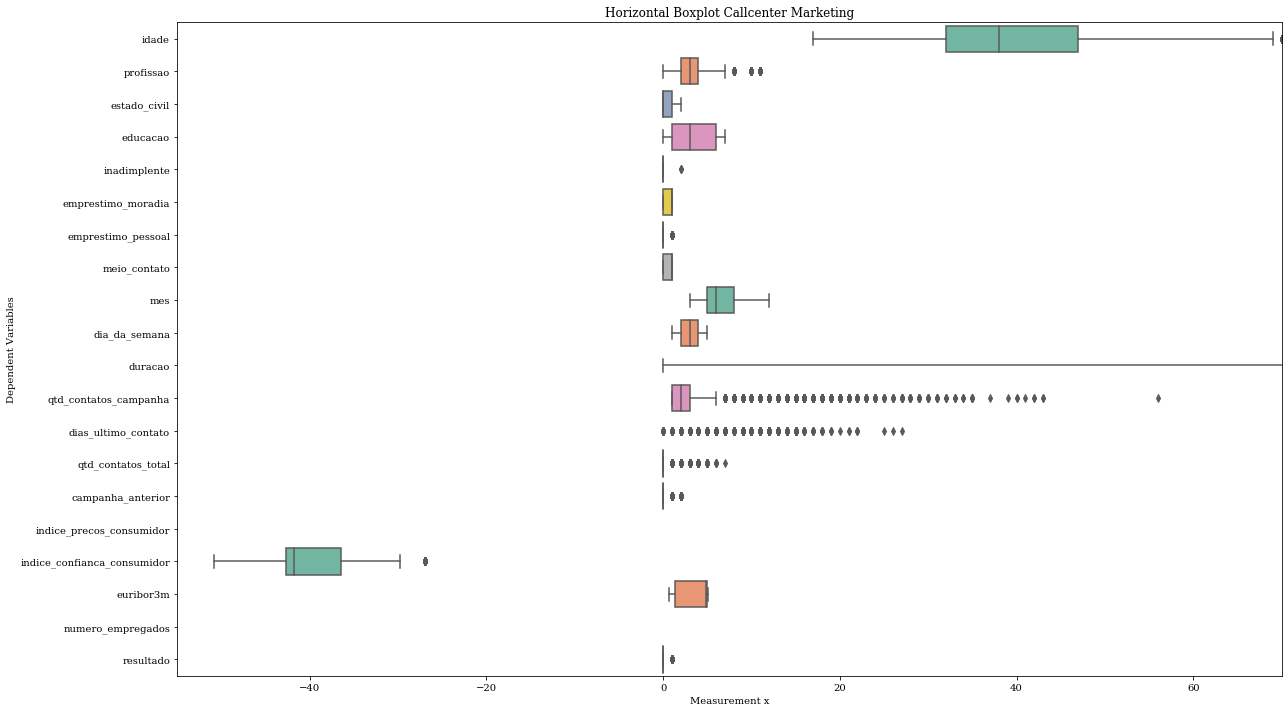

In [188]:
plot_box_plot(df_callcenter, 
              'Callcenter Marketing', 
              (-55, 70))

Os box plots ficaram muito dispersos, melhor analizar separadamente.

In [189]:
def show_boxplot(df, *columns):
    for column in columns:
        plt.figure (figsize = (17, 1)) 
        sns.boxplot(x=df[column],
                    width=0.5,
                    linewidth=1.0,
                    showfliers=True)

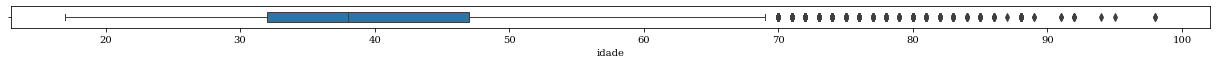

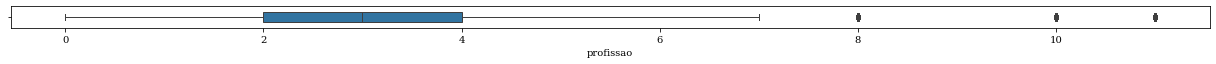

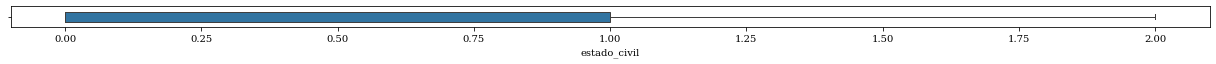

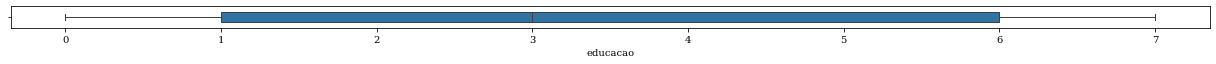

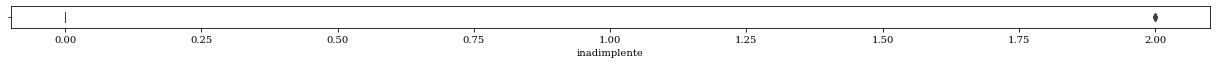

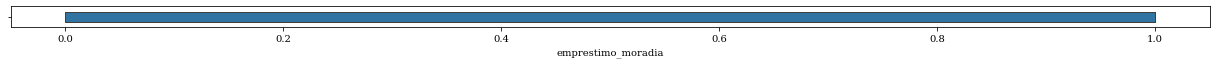

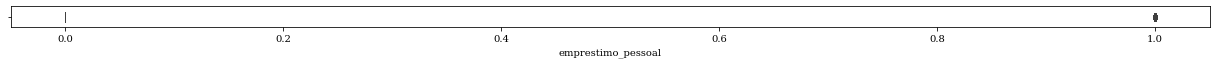

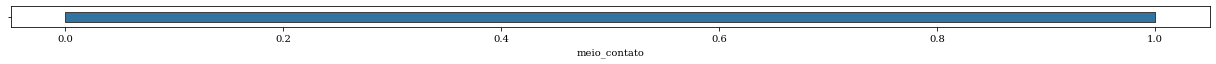

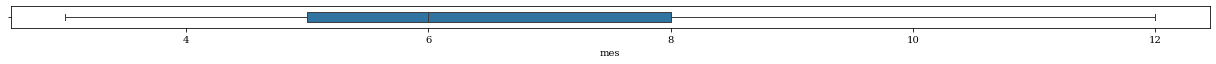

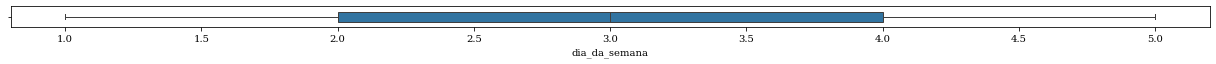

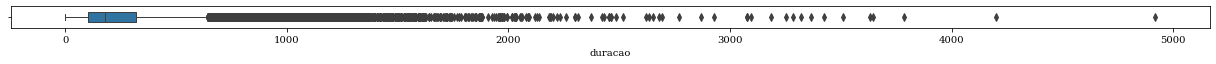

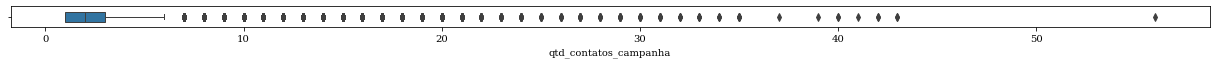

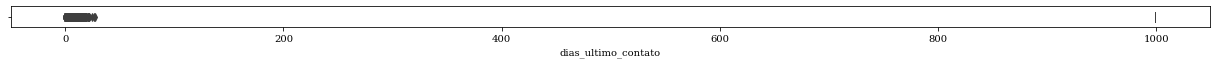

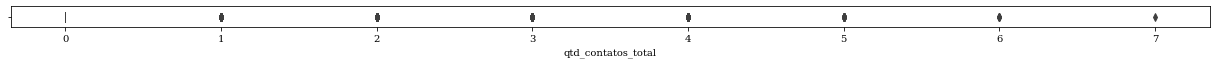

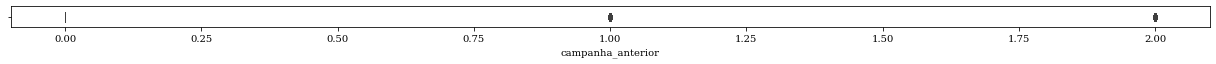

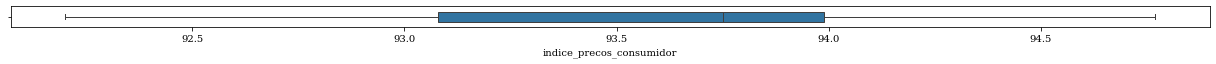

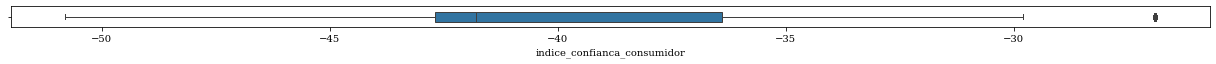

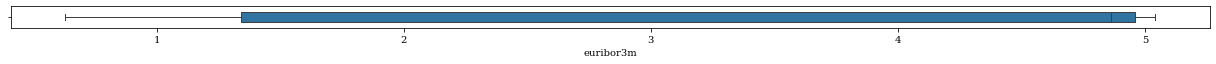

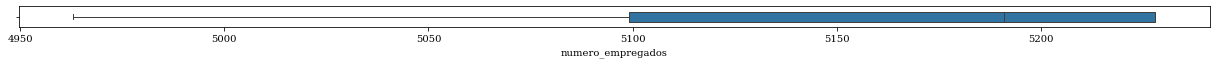

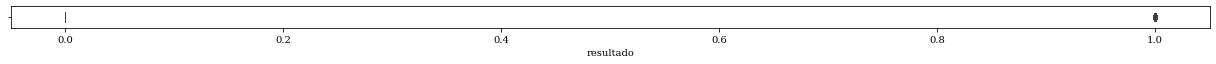

In [190]:
show_boxplot(df_callcenter, *list_columns)

#### Notas

- A variável `idade` apresenta outliers, contudo não se faz necessário tratar.


- `profissao`, `estado civil`, `educacao`, `meio_contato`, `mes`, `dia_semana` e `campanha_anterior` são variáveis provindas de valores categóricos.


- `inadimplente`, `emprestimo_pessoal`, `emprestimo_moradia` e `resultado` são variáveis categóricas que eram sim e nao. Além dessas, a variável `campanha_anterior` é um caso que apresenta somente 3 possíveis valores. Para estas variáveis, não cabe tratar outliers.


- `duracao` apresenta **2963 outliers**.
  - Analisando o boxplot, cabe aplicar a técnica de **rescale**.
  - Analisar qual o tempo mínimo e máximo para `resultado == sim`.
  - Testar a hipótese: se `duracao == 0`, então `resultado == nao`.<br/>
    OBS: caso resultado POSITIVO, poderá ser algum resultado de campanha anterior


- `qtd_contatos_campanha` apresenta **2406 outliers**. 
  - Analisando o boxplot, cabe aplicar a técnica de **rescale**.


- `qtd_contatos_total` apresenta **5625 outliers**.
  - Neste caso, qualquer contato > 0 já foi considerado outlier. Então, cabe testar a hipótese: se `qtd_contatos_total == 0`, então `resultado NEGATIVO`.<br/>
  OBS: qtd_contatos_total é número de contatos realizados antes desta campanha e para este cliente


 - `dias_ultimo_contato` apresenta outlier porque ficou registrado no dataset 999 dias em casos que não se tem uma previsão de último contato. Então isso se torna um outlier que precisa ser tratado. Contudo, a interpretação dos metadados desta coluna diz que são valores que não se tem noção de quando foi o último contato. Por isso, estes valores são `missing values` !
  - Neste caso, irei subtituir o valor 999 por 0 pois isso deixará uma distribuição mais perto da normal.


- `indice_confianca_consumidor` apresenta **446 outliers**.
  - São poucos outliers, por isso não irei aplicar alguma técnica de tratamento de outliers.


 - `indice_precos_consumidor`, `euribor3m`, `numero_empregados` não apresentam outliers.

#### Anásile de Tempo Mínimo e Máximo para `resultado == sim`

In [191]:
df_min = df_callcenter[['resultado','duracao']].sort_values(['duracao'])

print('Minimum duration in sec: \n{}\n'.format(df_min.query('resultado == 1').iloc[0]))
print('Maximum duration in sec: \n{}'.format(df_min.query('resultado == 1').iloc[-1]))

Minimum duration in sec: 
resultado     1
duracao      37
Name: 24016, dtype: int16

Maximum duration in sec: 
resultado       1
duracao      4199
Name: 22192, dtype: int16


- A partir de 37 segundos surge o primeiro resultao posivito
- Até 4199 segundos pode ocorrer um resultado positivo

Acredito que remover valores entre estes limites de duracao pode afetar o treinamento, por isso irei manter.

#### Tratamento de Outliers

- **Hipótese**:
Se `duracao == 0`, então `resultado NEGATIVO`

In [192]:
# 'resultado': {'nao': 0, 'sim': 1}

df_min = df_callcenter[['duracao','resultado']]
len(df_min.query('duracao == 0 & resultado == 1'))

0

Não há casos em que a ligação durou 0 minutos e o resultado foi positivo.

Então, a partir disso, esta confirmado os outliers. Vou eliminar as tuplas que apresentam a condição da hipótese levantada.

Todas as linhas que apresentam `duracao == 0` serão eliminadas.

In [193]:
print(f'Rows before operation = {df_callcenter.shape[0]}')

cond_duracao = (df_callcenter.duracao > 0) 
df_callcenter = df_callcenter[cond_duracao]

print(f'Rows after operation = {df_callcenter.shape[0]}')

Rows before operation = 41174
Rows after operation = 41170


- **Hipótese**: Se `qtd_contatos_total == 0`, então `resultado NEGATIVO`.

In [194]:
df_min = df_callcenter[['resultado','qtd_contatos_total']]

len(df_min.query('resultado == 1 & qtd_contatos_total == 0'))

3140

A princípio esta hipótese não foi válida, ou seja, mesmo que `qtd_contatos_total == 0`, há resultado POSITIVOS. Isso significa que deve haver pelo menos 1 contato da `qtd_contatos_total`

- **rescale**: `duracao`, `qtd_contatos_campanha`

In [195]:
def plot_distribuition(df: 'dataframe', column: str):
    plt.figure()
    df[column].plot.hist(alpha=0.5, color='blue')
    plt.title(f"Distribuição da Coluna {column}")
    plt.show()

    sns.boxplot(x=df[column],
                width=0.5,
                showfliers=True)

In [196]:
def apply_log(df: 'dataframe' = None,
              fix: int = 0,
              type_col: 'number' = 'int16',
              column: str = None):
    
    skew_before = df[column].skew()
    df[column] = [np.log(x + fix).astype(type_col) for x in df[column]]
    skew_after = df[column].skew()
    
    return f'Skew before = {skew_before} -> Skew after = {skew_after}'

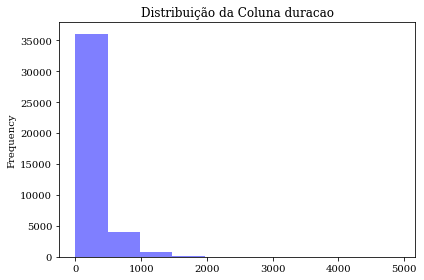

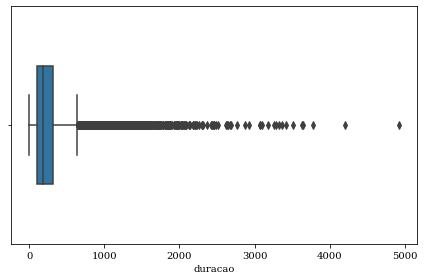

In [197]:
plot_distribuition(df_callcenter, 'duracao')

In [198]:
apply_log(df = df_callcenter,
          fix= 1,
          type_col = int,
          column = 'duracao')

'Skew before = 3.2628673006168816 -> Skew after = -0.36106321738750846'

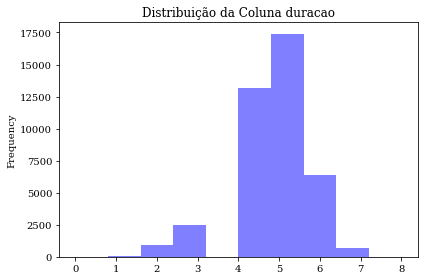

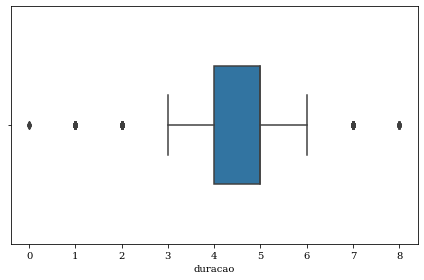

In [199]:
plot_distribuition(df_callcenter, 'duracao')

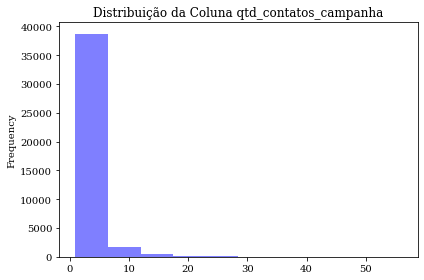

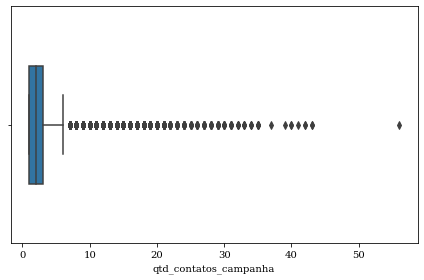

In [200]:
plot_distribuition(df_callcenter, 'qtd_contatos_campanha')

In [201]:
apply_log(df = df_callcenter,
          type_col = int,
          column = 'qtd_contatos_campanha')

'Skew before = 4.762798594693606 -> Skew after = 1.468090764742922'

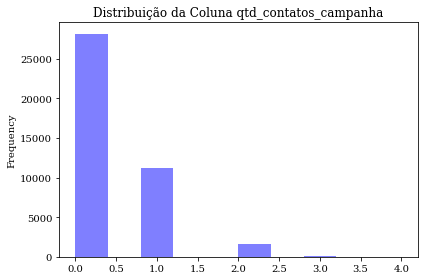

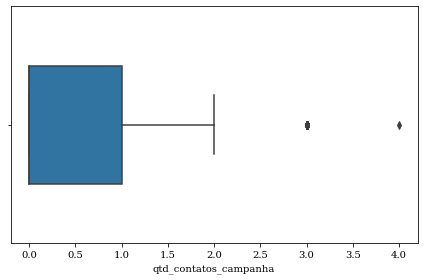

In [202]:
plot_distribuition(df_callcenter, 'qtd_contatos_campanha')

- `dias_ultimo_contato` substituição de valores
  - Neste caso, irei subtituir o valor 999 por 0 pois isso deixará uma distribuição mais perto da normal.

In [203]:
df_callcenter['dias_ultimo_contato'] = df_callcenter['dias_ultimo_contato'].replace(999, 0)

count_row_999 = len(df_callcenter.query('dias_ultimo_contato == 999'))
print(f'Rows with (dias_ultimo_contato == 999), after operation = {count_row_999}')

Rows with (dias_ultimo_contato == 999), after operation = 0


---

## Armazenamento dos Dados Limpos

In [204]:
def save_data_clenning(df: 'dataframe' = None,
                       path: str = 'data/cleansing') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')
    
    return "Data storage!"

In [205]:
save_data_clenning(df = df_callcenter,
                   path = 'data/cleansing/callcenter_marketing_clenning.csv')

'Data storage!'